In [152]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [153]:
alphap = 3
probp = 0.75
#expon = 2 * alphap - 1
#ensemble_sizep = 50_000
min_iterationp = 100_000
#bin_sizep = 0.001

In [154]:
import glob
dir_data = "../../data/alpha3/"
files = glob.glob(dir_data + "data_collapse_alpha_3_t_*")
files

['../../data/alpha3/data_collapse_alpha_3_t_300k',
 '../../data/alpha3/data_collapse_alpha_3_t_100k',
 '../../data/alpha3/data_collapse_alpha_3_t_200k']

In [155]:
import scipy.special as sc

n_star = np.linspace(0,1,1_000_001)

def func_trans(n_star,alpha,p):
    """left-hand side of transcendental equation defined as a numpy array"""
    return (sc.gamma(n_star+alpha)*sc.gamma(2*alpha))/(sc.gamma(n_star+2*alpha)*sc.gamma(alpha))-1/(1+p)

In [156]:
def find_df(alpha,p):
    """root finding by minimizing the cost function: square of left-hanad side"""
    cost_array = func_trans(n_star,alpha,p)**2
    min_index = np.argmin(cost_array)
    df_value = n_star[min_index]
    #df_rounded = float("{:.6f}".format(df_value))
    #return df_rounded
    return df_value

In [157]:
def phi_value_alpha_3(xi,p):
    xi_list = np.linspace(0,2,10_001)
    if abs(p-0.1) <= 1e-6:
        filename = 'phi_0_10_list.csv'
    elif abs(p-0.5) <= 1e-6:
        filename = 'phi_0_50_list.csv'
    elif abs(p-0.9) <= 1e-6:
        filename = 'phi_0_90_list.csv'        
    elif abs(p-0.75) <= 1e-6:
        filename = 'phi_0_75_list.csv'       
    else:
        print('analytical values available only for p equal 0.10, 0.50, 0.75 and 0.90')
        return None

    phi_list = np.loadtxt(filename)

    if xi > 2:
        phi_value = 0
    elif xi in xi_list:
        index = list(xi_list).index(xi)
        phi_value = phi_list[index] 
    else:
        index0 = int(xi//0.0002)
        index1 = int(index0+1)
        del_xi = xi%0.0002
        phi_0 = phi_list[index0]
        phi_1 = phi_list[index1]
        del_phi = (phi_1-phi_0)*del_xi/0.0002
        phi_value = phi_0 + del_phi

    return phi_value

def phi_list_alpha_3(xi_list,p):
    phi_list = []
    for xi in xi_list:
        phi_value = phi_value_alpha_3(xi,p)
        phi_list.append(phi_value) 

    return np.array(phi_list)

def phi_list(alpha,p,xi_list):
    
    df = find_df(alpha,p)
    
    if alpha == 1:
        density = np.exp(-xi_list)
        return density
    
    elif alpha == 2:
        c2 = -(sc.gamma(1/3)/sc.gamma(5/3))*(sc.gamma((df+5)/3)/sc.gamma((df+3)/3))
        density1 = -3*(df+2)*(xi_list**2)*sc.hyp1f1(-(df-1)/3, 4/3, -xi_list**3)
        density2 = -(3/5)*c2*df*(xi_list**4)*sc.hyp1f1(-(df-3)/3, 8/3, -xi_list**3)
        density3 = -2*c2*(xi_list)*sc.hyp1f1(-df/3, 5/3, -xi_list**3)
        density = density1 + density2+ density3
        return density
    
    elif alpha == 3:
        density = phi_list_alpha_3(xi_list,p)
        
    else:
        print('the analytical solution for alpha = {} value is unknown'.format(alpha))
        
    return density

In [158]:
# data_dct = dict()
# for file in files:
#     i = int(file[-4:-1])
#     data = np.loadtxt(file)
#     data_dct[i] = data
#     x,y = data.T
#     print(data_dct[i][0:])

In [159]:
# signature = 'data_collapse_alpha_2_t_{}k'
# for i in range(3):
#     time_t = min_iterationp*(i+1)
#     x,y = data_dict[time_t]
#     file_name = signature.format(int(time_t//1000))
#     np.savetxt(file_name,np.c_[x,y])

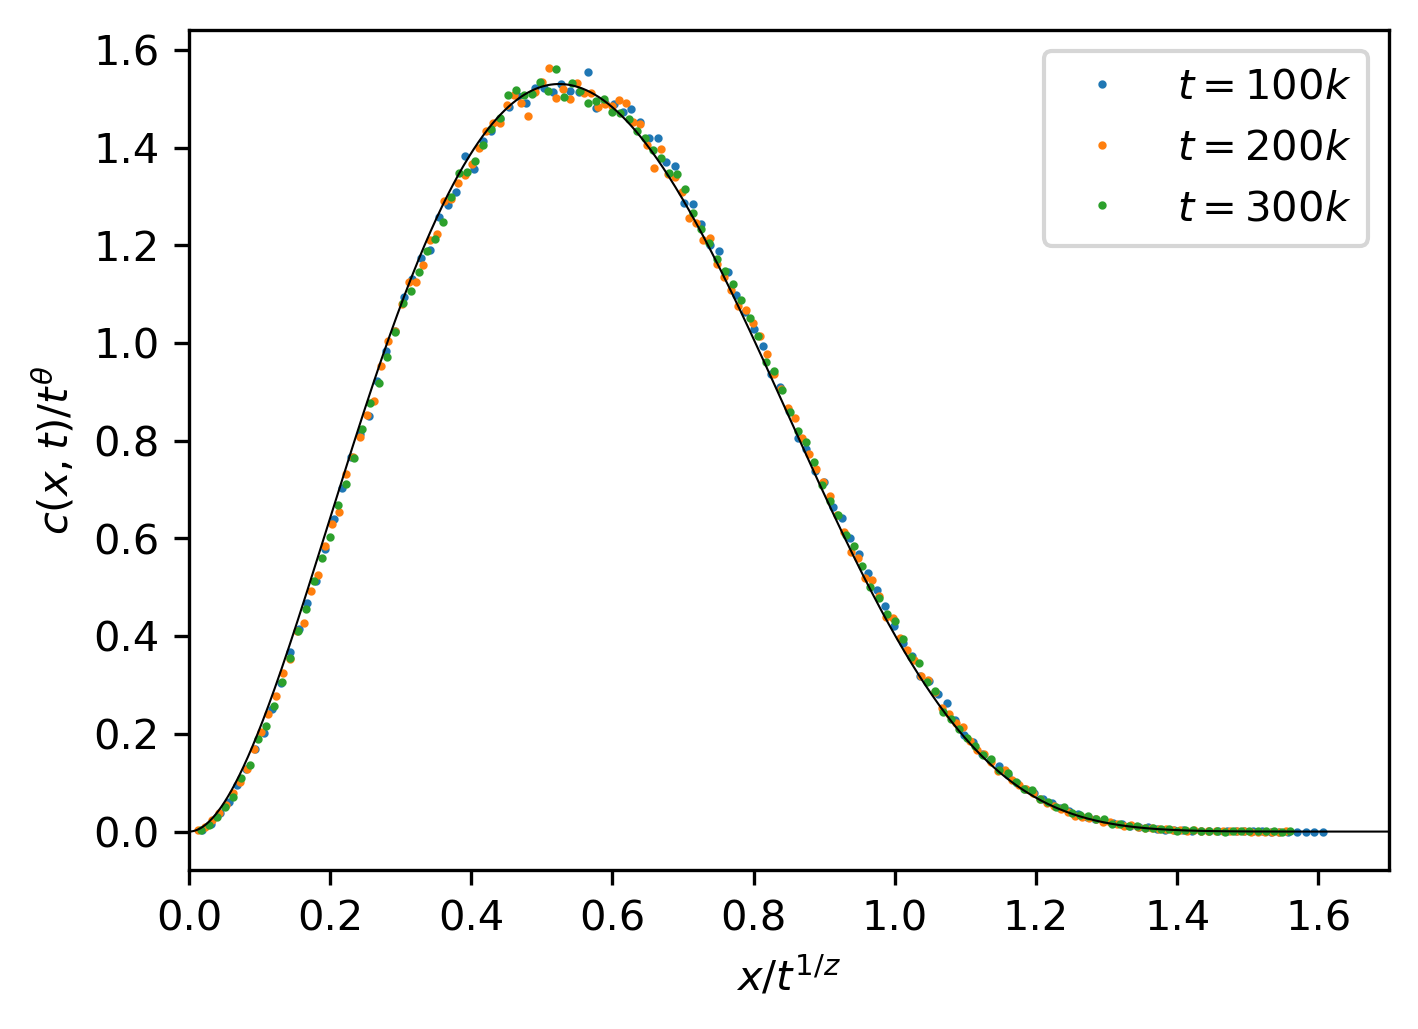

In [160]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    data = np.loadtxt(files[i]).T
    x,y = data
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

xi_th = np.linspace(0,2.1,10501)
phi_th = phi_list(alphap,probp,xi_th)
plt.plot(xi_th,phi_th,color='black',linewidth=0.5)

plt.legend(loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 1.7])
axes.set_position([0.15, 0.15, 0.8, 0.8])

plt.savefig("pn_data_coll_alpha_3.pdf")